In [90]:
# Imports
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [100]:
# Load data
filename = "./diffused.csv"
data = np.genfromtxt(filename, delimiter=',', skip_header=1)

# Slice data
angles = data[:,0]
readings = data[:, 1:]

# Parse headers
with open(filename, 'r') as f:
    headers = f.readline().strip().split(',')[1:]
    wavelengths = np.array([float(s.replace("nm", "")) for s in headers])

print(angles.shape)
print(readings.shape)
print(wavelengths.shape)

(181,)
(181, 2048)
(2048,)


In [102]:
# Load dark readings
filename = "./diffused_dark.csv"
dark_data = np.genfromtxt(filename, delimiter=',', skip_header=1)

# Do dark correction
readings -= dark_data[:, 1:]

In [116]:
# Decimate spectra to single intensity values

# Window limits (nanometers)
WAVELENGTH_WINDOW_MIN = 450
WAVELENGTH_WINDOW_MAX = 750

# Get wavelength indices within window
wl_indices = np.where(
    (wavelengths >= WAVELENGTH_WINDOW_MIN) & 
    (wavelengths <= WAVELENGTH_WINDOW_MAX)
)[0]

# Slice data array
# filtered_wavelengths = wavelengths[wl_indices]
filtered_data = data[:, wl_indices]

# Compute means & normalize
row_means = np.mean(filtered_data, axis=1)
normed_means = row_means / np.max(row_means)
print(normed_means.shape)


(181,)


In [112]:
# Load ThorLabs data
thor_filename = "./thorlabs_m565d2_data.csv"
thor_data = np.genfromtxt(thor_filename, delimiter=',')

# Slice data
thor_angles = thor_data[:,0]
thor_normed_intensity = thor_data[:,1]

# Create negative-angle values
angles_negative = -np.flip(thor_angles)
thor_angles = np.concatenate((angles_negative, thor_angles))

intensities_reverse = np.flip(thor_normed_intensity)
thor_normed_intensity = np.concatenate((intensities_reverse, thor_normed_intensity))

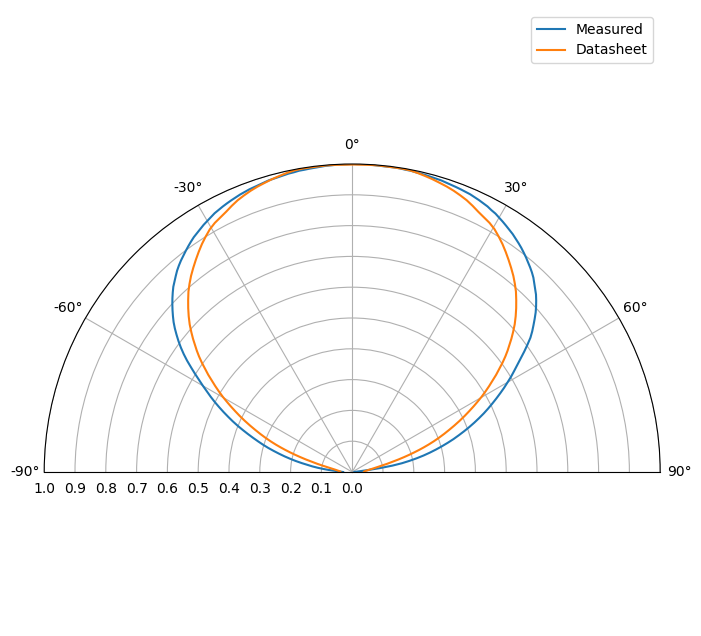

In [122]:
# Plot in polar coordinates
# Set the default figure size to wide and short

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Plot intensity versus angle
ax.plot(np.deg2rad(angles), normed_means, label="Measured")
ax.plot(np.deg2rad(thor_angles), thor_normed_intensity, label="Datasheet")

# Rotate the plot so that 0 degrees is at the top
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Set axis limits
ax.set_xlim(-np.pi/2, np.pi/2)
ax.set_ylim(0, 1)

# Add more tick marks
ax.set_yticks(np.arange(0, 1.1, 0.1))

# Create legend
ax.legend()

# Display the plot
plt.show()